# Белуга

**Алкогль / [Белуга](https://belugagroup.ru/) (BELU)**

Лидер в России по производству крепкого алкоголя

[Фундаментальный анализ](https://journal.tinkoff.ru/analiz-emitenta/)

In [1]:
company = 'BELU'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib import cm

%matplotlib inline

In [3]:
dt = pd.read_excel('../tables/belu.xlsx', sheet_name='Data', index_col='Год').T.reset_index()
dt.rename({'index': 'Year'}, axis=1, inplace=True)
dt = dt.sort_index(ascending=False).reset_index(drop=True)
n_years = len(dt.index)

In [44]:
dt.head()

Год,Year,Выручка,Себестоимость,Валовая прибыль,Операционная прибыль,Прибыль до налогообложения,Налог на прибыль,Чистая прибыль,Внеоборотные активы,Оборотные активы,...,Чистый долг,EV,EBITDA,EV/EBITDA,EV/S,P/E,P/S,Debt/EBITDA,ROA,Дивиденды на акцию
0,2013,2.637800e+10,1.509800e+10,1.128000e+10,3.127000e+09,1.925000e+09,384000000.0,1.541000e+09,1.399300e+10,2.028900e+10,...,NaN,NaN,3.674000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,2.816300e+10,1.613500e+10,1.202800e+10,2.274000e+09,1.329000e+09,239000000.0,1.090000e+09,1.483600e+10,1.988300e+10,...,NaN,NaN,2.973000e+09,NaN,NaN,NaN,NaN,NaN,0.031594,NaN
2,2015,3.070600e+10,1.803300e+10,1.267300e+10,2.109000e+09,3.720000e+08,131000000.0,2.410000e+08,1.546700e+10,2.018600e+10,...,NaN,NaN,2.885000e+09,NaN,NaN,NaN,NaN,NaN,0.006849,NaN
3,2016,3.590300e+10,2.138500e+10,1.451800e+10,2.486000e+09,4.530000e+08,178000000.0,2.750000e+08,1.689300e+10,2.110000e+10,...,8.043000e+09,NaN,3.212000e+09,NaN,NaN,NaN,NaN,2.818493,0.007468,NaN
4,2017,3.730300e+10,2.362800e+10,1.367500e+10,2.848000e+09,9.260000e+08,271000000.0,6.550000e+08,1.786100e+10,2.313400e+10,...,1.019300e+10,2.115348e+10,3.616000e+09,5.849968,0.567072,16.733565,0.293823,3.045354,0.016585,0.0


## Динамика выручки, капитала, обязательств, активов

In [45]:
dt.columns

Index(['Year', 'Выручка', 'Себестоимость', 'Валовая прибыль',
       'Операционная прибыль', 'Прибыль до налогообложения',
       'Налог на прибыль', 'Чистая прибыль', 'Внеоборотные активы',
       'Оборотные активы', 'Запасы', 'Активы', 'Капитал',
       'Долгосрочные обязательства', 'Краткосрочные обязательства',
       'Обязательства', 'Пассивы', 'Налог на прибыль, %', 'Амортизация',
       'Capex', 'Оборотный капитал', 'Изменение в оборотном капитале', 'FCF',
       'Количество акций', 'Цена акции', 'Капитализация',
       'Долгосрочные кредиты', 'Краткосрочные кредиты', 'Долг', 'Cash',
       'Чистый долг', 'EV', 'EBITDA', 'EV/EBITDA', 'EV/S', 'P/E', 'P/S',
       'Debt/EBITDA', 'ROA', 'Дивиденды на акцию'],
      dtype='object', name='Год')

In [18]:
def get_color(palette, n_pics, index):
    return palette(index/n_pics,1)

def smooth_curve(x, y, num_newx=300, power=2):
    x, y = np.extract(~(np.isnan(x)|np.isnan(y)), x), np.extract(~(np.isnan(x)|np.isnan(y)), y)
    n_years = x.size
    xnew = np.linspace(x.min(), x.max(), num_newx)  
    spl = make_interp_spline(x, y, k=power)
    markers = np.linspace(0, xnew.size-1, n_years).astype(int)
    return (xnew, spl(xnew), markers)
    

## Активы, выручка

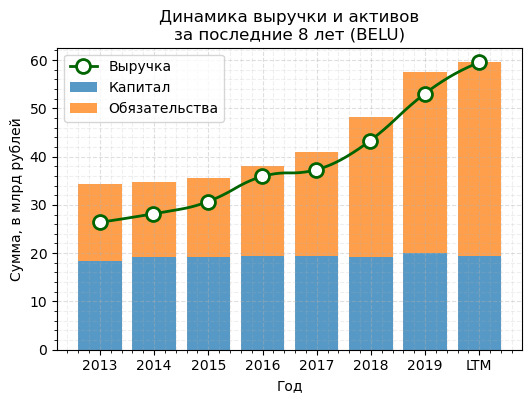

In [141]:
plt.figure(dpi=100)

plt.grid(ls='--', alpha=0.4)
plt.grid(which='minor', ls='--', alpha=0.2)
plt.minorticks_on()

plt.bar(dt.index, dt['Капитал']*1e-9, label='Капитал', alpha=0.75)
plt.bar(dt.index, dt['Обязательства']*1e-9, bottom=dt['Капитал']*1e-9, label='Обязательства', alpha=0.75)

xn, yn, m_every = smooth_curve(dt.index, dt['Выручка']*1e-9)
plt.plot(xn, yn, label='Выручка', c='darkgreen', ls='-', ms=10, lw=2, 
         marker='o', markevery=m_every, markeredgecolor='darkgreen', markerfacecolor='w', markeredgewidth=2)


plt.xticks(dt.index, dt.Year);
plt.legend()
plt.title(f'Динамика выручки и активов\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей');
# plt.savefig('../images/1_assets.png', dpi=200);

## Чистая прибыль, EBITDA

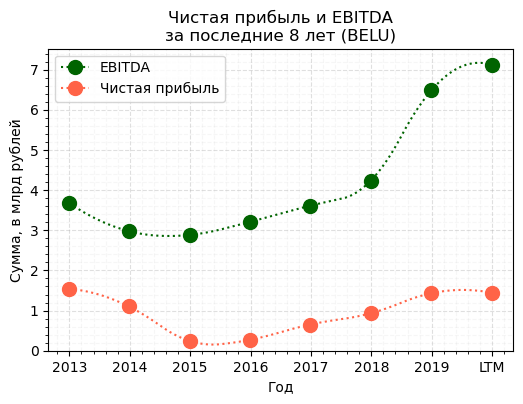

In [143]:
name = "Чистая прибыль и EBITDA"
plt.figure(dpi=100)


xn, yn, m = smooth_curve(dt.index, dt['EBITDA']*1e-9)
plt.plot(xn, yn, marker='o', ms=10, label='EBITDA', c='darkgreen', ls=':', markevery=m)

xn, yn, m = smooth_curve(dt.index, dt['Чистая прибыль']*1e-9)
plt.plot(xn, yn, marker='o', ms=10, label='Чистая прибыль', c='tomato', ls=':', markevery=m)


plt.ylim(0, None)
plt.xticks(dt.index, dt.Year)
plt.legend()
plt.title(f'{name}\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--', alpha=0.4)
plt.grid(which='minor', ls='--', alpha=0.1)
plt.minorticks_on();
# plt.savefig('../images/2_net_profit.png', dpi=200)

##  Финансовое здоровье

### D/E
`Debt / Eq` — соотношение заемных средств к собственному капиталу. Этот коэффициент используют, чтобы оценить финансовую устойчивость организации. Оптимальное значение `Debt / Eq` — в диапазоне от 0,3 до 1, при этом оно сильно разнится в зависимости от отрасли, размера компании и способа управления, поэтому следует оценивать динамику коэффициента и сравнивать его с конкурентами. В частности, для банков обычная картина, если уровень долга превышает собственный капитал, то есть `Debt / Eq` больше единицы, так как банки активно заимствуют средства и кредитуют клиентов.

### Quick ratio (коэффициент срочной ликвидности)
Это отношение высоколиквидных активов за вычетом складских запасов к краткосрочным обязательствам. Этот параметр показывает способность компании погасить краткосрочные обязательства за счет быстрореализуемых активов.

Этот коэффициент показывает способность ответить по текущим долгам в случае возникновения каких-либо сложностей. Ситуация в компании считается стабильной, если коэффициент не меньше 1.

### Current ratio (коэффициент текущей ликвидности)
Этот коэффициент показывает, как компания может погашать текущие обязательства за счет только оборотных активов. Чем выше коэффициент, тем выше платежеспособность предприятия. Если этот показатель ниже 1,5, значит, предприятие не в состоянии вовремя оплачивать все счета. Идеальный показатель — 2.

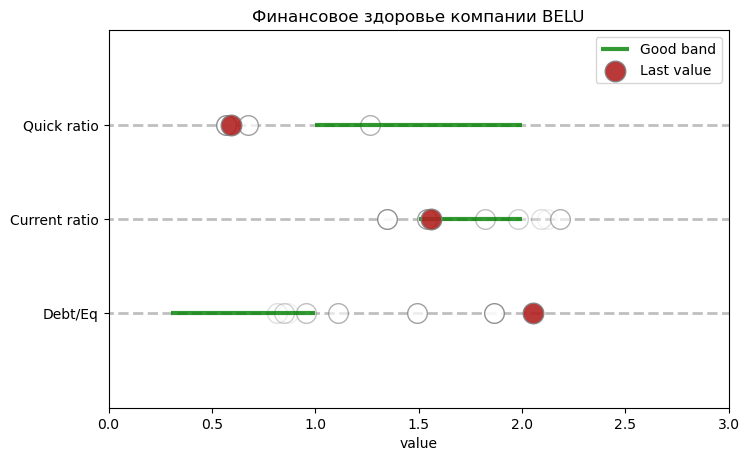

In [155]:
# Draw horizontal lines
fig, ax = plt.subplots(dpi=100, figsize=(8,5))

ratios = {
    'Debt/Eq' : [dt['Обязательства']/dt['Капитал'], (0.3, 1)],
    'Current ratio': [dt['Оборотные активы']/dt['Краткосрочные обязательства'], (1.5, 2)],
    'Quick ratio': [(dt['Оборотные активы']- dt['Запасы'])/dt['Краткосрочные обязательства'], (1, 2)]
}

ax.hlines(y=list(ratios.keys()), xmin=-10, xmax=13, color='gray', alpha=0.5, 
          zorder=0, linewidth=2, linestyles='--')

# # Draw the Dots
for i, coeff in enumerate(ratios):
    data = ratios[coeff][0]
    xmin, xmax = ratios[coeff][1]
    ax.hlines(y=coeff, xmin=xmin, xmax=xmax, color='green', alpha=0.8, linewidth=3, 
              linestyles='-', label='Good band' if i==0 else '')
    for j, point in enumerate(data.iloc[:-1]):
        opacity = (j+1)/(len(data))
        ax.scatter(y=coeff, x=point, s=200, edgecolors='gray', c='w', alpha=opacity, zorder=1)
    ax.scatter(y=coeff, x=data.iloc[-1], s=220, c='firebrick', alpha=0.9,
               label='Last value' if i==0 else '', edgecolors='gray', zorder=2)
        
plt.legend()
ax.set_xlim(0, 3);
ax.set_ylim(-1, 3);
plt.title(f'Финансовое здоровье компании {company}')
plt.xlabel('value');
# plt.savefig('../images/3_fin_health.png', dpi=200)

##  Эффективность компании

### Net Profit Margin (Net Margin) 
чистая рентабельность, отношение чистой прибыли к выручке. Если у бизнеса высокая маржинальность, то он более устойчив к падению цен на его продукт или к росту цен на сырье, задействованное в производстве. Параметр часто зависит от рода деятельности компании, от того, насколько она технологична, относится ли к производству товаров или к сфере услуг, поэтому критерий следует сравнивать среди аналогичных предприятий.

Чем выше **Net Margin**, тем лучше. У технологичных акций и акций роста этот показатель обычно превышает 15%. Еще желательно посмотреть на динамику: если рентабельность повышается, можно говорить об эффективном менеджменте компании и положительном векторе развития бизнеса.

### Gross margin
Валовая маржа или валовая рентабельность – это выручка компании за вычетом себестоимости реализованных товаров (COGS). Другими словами, это процент выручки от продаж, которую компания сохраняет после понесённых прямых затрат, связанных с производством товаров, которые она продает или услуг, которые она предоставляет. 

Таким образом, чем выше средняя маржа валовой прибыли, тем больше компания сохраняет финансов на каждый рубль продаж, которые она затем может направить для обслуживания других расходов или обязательств.

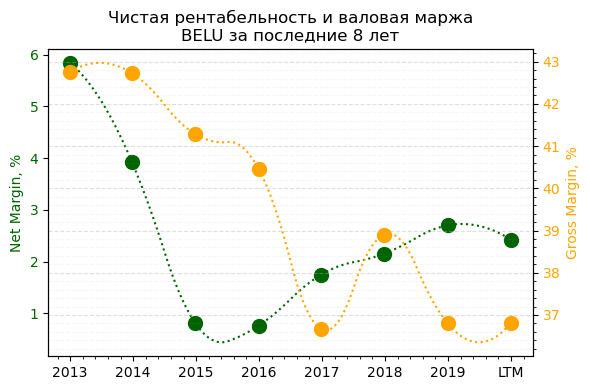

In [145]:
name = "Чистая рентабельность и валовая маржа"
dt['Net Margin'] = dt['Чистая прибыль']/dt['Выручка']
dt['Gross Margin'] = (dt['Выручка'] - dt['Себестоимость'])/dt['Выручка']

fig, ax1 = plt.subplots(dpi=100)

color1 = 'darkgreen'
xn, yn, m = smooth_curve(dt.index, dt['Net Margin']*100)
ax1.plot(xn, yn, marker='o', ms=10, label='Net Margin', c=color1, ls=':', markevery=m)
ax1.set_ylabel('Net Margin, %', c=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'orange'
xn, yn, m = smooth_curve(dt.index, dt['Gross Margin']*100)
ax2.plot(xn, yn, marker='o', ms=10, label='Gross Margin', c=color2, ls=':', markevery=m)
ax2.set_ylabel('Gross Margin, %', c=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# plt.ylim(0, None)
plt.xticks(dt.index, dt.Year);
plt.title(f'{name}\n{company} за последние {n_years} лет')
plt.xlabel('Год')
plt.grid(ls='--', alpha=0.4)
plt.grid(which='minor', ls='--', alpha=0.1)
plt.minorticks_on();
fig.tight_layout();
# plt.savefig('../images/4_net_margin.png', dpi=200)

### ROE
**Return on Equity**, возврат на собственный капитал. Показатель характеризует эффективность использования средств акционеров в годовом исчислении. Иными словами, сколько прибыли принес один вложенный акционерами доллар в процентном соотношении. Например, при **ROE** 15% можно заключить, что каждый вложенный в компанию доллар принес 15 центов прибыли. В определенном смысле параметр **ROE** можно сравнить со ставкой по банковским депозитам. Чем параметр выше, тем лучше, но ROE меньше 20% считается низким.

### ROA
Коэффициент рентабельности активов, показывающий процентное соотношение чистой прибыли предприятия к его общим активам (данные по балансу).

Коэффициент **ROA** простыми словами – это финансовый показатель эффективности ведения бизнеса, который, фактически, говорит о результативности использования компанией своего имущества, включая кредитные заимствования.

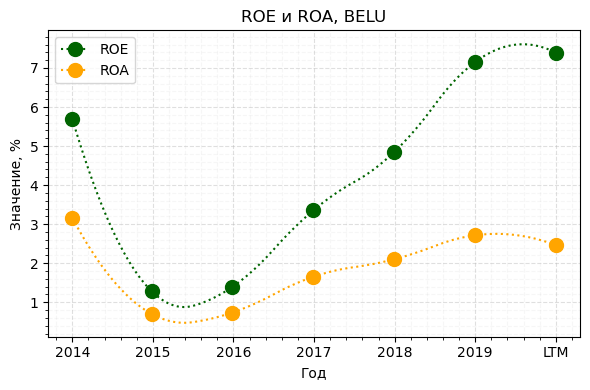

In [146]:
name = "ROE и ROA"
dt['ROE'] = dt['Чистая прибыль']/dt['Капитал']
dt_temp = dt[['Year', 'ROE', 'ROA']].dropna()

fig, ax1 = plt.subplots(dpi=100)

color1 = 'darkgreen'
xn, yn, m = smooth_curve(dt_temp.index, dt_temp['ROE']*100)
ax1.plot(xn, yn, marker='o', ms=10, label='ROE', c=color1, ls=':', markevery=m)

color2 = 'orange'
xn, yn, m = smooth_curve(dt_temp.index, dt_temp['ROA']*100)
ax1.plot(xn, yn, marker='o', ms=10, label='ROA', c=color2, ls=':', markevery=m)

plt.legend()
plt.xticks(dt_temp.index, dt_temp.Year);
plt.title(f'{name}, {company}')
plt.xlabel('Год')
plt.ylabel('Значение, %')
plt.grid(ls='--', alpha=0.4)
plt.grid(which='minor', ls='--', alpha=0.1)
plt.minorticks_on();
fig.tight_layout();
# plt.savefig('../images/5_ROE_ROA.png', dpi=200)

## [Оценка дивидендной стабильности](https://www.dohod.ru/ik/analytics/dividend/belu)

### Payout
Доля от прибыли, которую компания направляет на дивиденды. Если он близок к 100% либо превышает это значение, то дела плохи: компании придется либо брать в долг, чтобы рассчитаться с акционерами, либо урезать дивидендные выплаты — а это скажется на котировках. Обычные значения параметра Payout находятся в диапазоне 20—50%, исключение — REIT, которые по закону обязаны делиться не менее чем 90% своей прибыли.

### Дивидендная доходность 
Отношение величины годового дивиденда на акцию к цене акции.

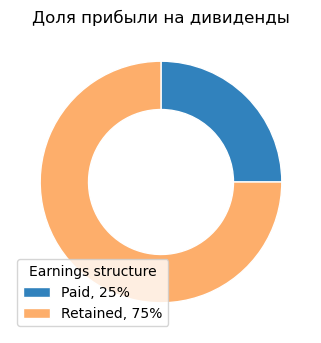

In [148]:
name = 'Доля прибыли на дивиденды'
payout = 0.25 #dohod.ru

fig, ax = plt.subplots(dpi=100)

size = 0.4
vals = np.array([payout, 1-payout])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*6)

w, ff = ax.pie(vals, radius=1, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'))

# ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
#        wedgeprops=dict(width=size, edgecolor='w'))

ax.legend(w, [f'Paid, {payout*100:.0f}%', f'Retained, {(1-payout)*100:.0f}%'], title='Earnings structure')
ax.set(aspect="equal", title=name);
# plt.savefig('../images/6_payout.png', dpi=200)

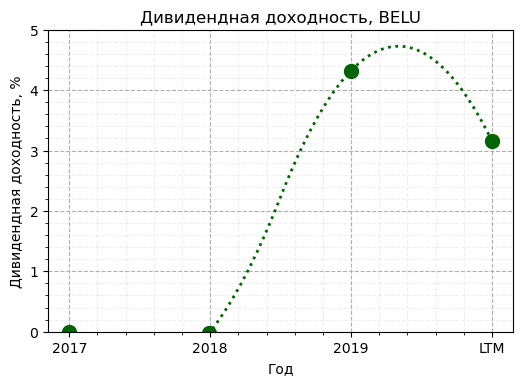

In [149]:
name = f"Дивидендная доходность, {company}"
data = 100*dt['Дивиденды на акцию']/dt['Цена акции']

plt.figure(dpi=100)

plt.xticks(dt.index, dt.Year)
x, y, m = smooth_curve(dt.index, data)
plt.plot( x, y, marker='o', ms=10, ls=':', c='darkgreen', markevery=m, lw=2 )
# plt.legend()
plt.title(f'{name}')#{n_years} лет ({company})')
plt.ylim(0, None)
plt.xlabel('Год')
plt.ylabel('Дивидендная доходность, %')
plt.grid(ls='--')
plt.grid(which='minor', ls='--', alpha=0.2)
plt.minorticks_on()
# plt.savefig('../images/7_dividend_share_percent.png', dpi=200)

##  Рыночная капитализация
**Market cap** — капитализация компании. Это стоимость одной акции, умноженная на их количество на бирже. Приоритет я обычно отдаю компаниям со средней и крупной капитализацией — от 2 и от 10 млрд долларов соответственно. Такие компании называют голубыми фишками. Это давно зарекомендовавшие себя компании, которые у всех на слуху. Чем крупнее компания, тем она устойчивее, у таких акций не возникает проблем с ликвидностью, их всегда можно продать и купить.

Молодые компании часто растут на ожиданиях и могут демонстрировать значительный рост за счет эффекта низкой базы, но сможет ли бизнес сохранить операционные показатели на большой дистанции и при шоковых сценариях — покажет время.

Еще в мелких компаниях второго и третьего эшелона возможны манипуляции с ценой. Это не означает, что не стоит делать ставку на перспективные компании малой капитализации. Просто нужно адекватно оценивать риск венчурных активов и выделять им долю, не превышающую 1—2% портфеля.

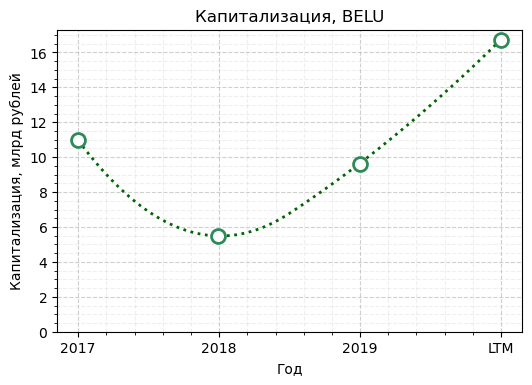

In [156]:
name = "Капитализация"
data = dt['Капитализация']*1e-9

plt.figure(dpi=100)
plt.xticks(dt.index, dt.Year)
x, y, m = smooth_curve(dt.index, data)
plt.plot( x, y, marker='o', ms=10, label='Капитализация', c='darkgreen', 
         ls=':', markevery=m, lw=2, markeredgecolor='seagreen', markeredgewidth=2,
         markerfacecolor='w')
# plt.legend()
plt.ylim(0, None)
plt.title(f'{name}, {company}')
plt.xlabel('Год')
plt.ylabel('Капитализация, млрд рублей')
plt.grid(ls='--', alpha=0.6)
plt.grid(which='minor', ls='--', alpha=0.2)
plt.minorticks_on()
# plt.savefig('../images/8_capitalization.png', dpi=200)

##  Оцененность компании

1. **P / E** — это отношение стоимости акции к чистой прибыли компании на одну акцию. Еще его можно интерпретировать так: сколько годовых прибылей стоит компания.

    Если параметр отрицательный, то компания работает в убыток — я сразу отметаю такие варианты. Смысла инвестировать в убыточную компанию не вижу, так как на рынке много привлекательных и финансово здоровых представителей. Если **P / E** значительно выше среднего по своему сектору, возможно, акция переоценена или с ней связаны высокие ожидания. Еще высокий мультипликатор может быть результатом того, что у компании резко упала прибыль, а рынок не отыграл это событие. Поэтому индикатор сам по себе ни о чем еще не говорит, нужно копать дальше.


2. **P / B** — отношение стоимости компании к ее балансу. Если у компании отрицательный баланс, то есть обязательства компании превышают ее активы, то **P / B** будет отрицательным. Такие компании лучше обойти стороной. У устойчивых компаний обычно положительный прирост активов по отношению к обязательствам, это свидетельствует об эффективном менеджменте. Компания должна постоянно наращивать «жирок», который поможет ей выжить, если наступит кризисный период.

    **P / B** меньше единицы означает, что компания оценена рынком ниже, чем имеется активов на ее балансе. Справедливый **P / B** равен единице: капитализация полностью соответствует активам. Если **P / B** сильно выше единицы, акция, вероятно, переоценена. Но здесь могут быть исключения, все зависит от специфики бизнеса. Например, у электроэнергетических компаний обычно на балансе развернутая инфраструктура и масса материальных активов: земля, здания, ЛЭП, трансформаторы, специальное оборудование. В результате чего **P / B** таких компаний низкий.


3. **EV / EBITDA** vs **Debt / EBITDA**

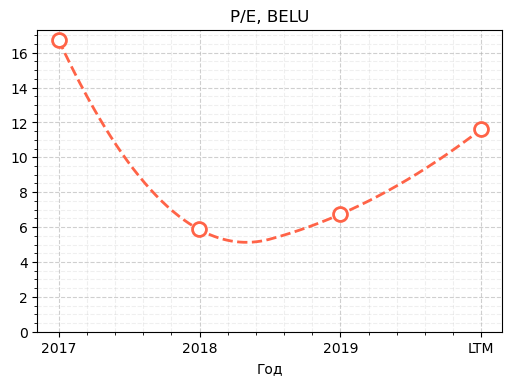

In [151]:
name = "P/E"

plt.figure(dpi=100)
plt.xticks(dt.index, dt.Year)
x, y, m = smooth_curve(dt.index, dt['P/E'])
plt.plot( x, y, marker='o', ms=10, label=name, ls='--', c='tomato', 
         markevery=m, lw=2, markeredgecolor='tomato', markeredgewidth=2,
         markerfacecolor='w')

plt.title(f'{name}, {company}')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--', alpha=0.6)
plt.grid(which='minor', ls='--', alpha=0.2)
plt.minorticks_on()

# plt.savefig('../images/9_PE.png', dpi=200)

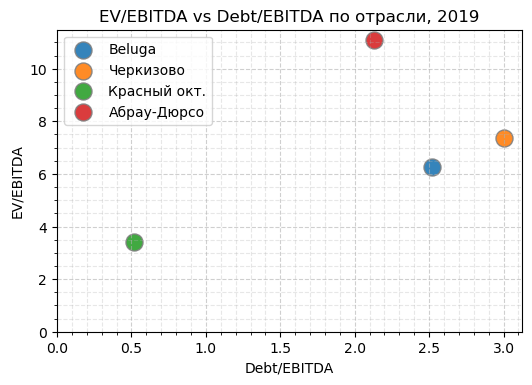

In [152]:
plt.figure(dpi=100)

data = { 
    'Beluga' : (6.28, 2.52),
    'Черкизово': (7.35, 3),
    'Красный окт.': (3.42, 0.52),
    'Абрау-Дюрсо': (11.1, 2.13)
} # conomy.ru

for comp in data:
    x, y = data[comp]
    plt.scatter(y, x, label=comp, s=150, alpha=0.9, edgecolor='gray')
plt.xlim(0, None)
plt.ylim(0, None)

plt.grid(ls='--', alpha=0.6)
plt.grid(which='minor', ls='--', alpha=0.3)
plt.minorticks_on()
plt.title('EV/EBITDA vs Debt/EBITDA по отрасли, 2019')
plt.ylabel('EV/EBITDA')
plt.xlabel('Debt/EBITDA')
plt.legend(loc='upper left');
# plt.savefig('../images/10_EV_DEBT_EBITDA.png', dpi=200)

## Оценка стоимости DCF

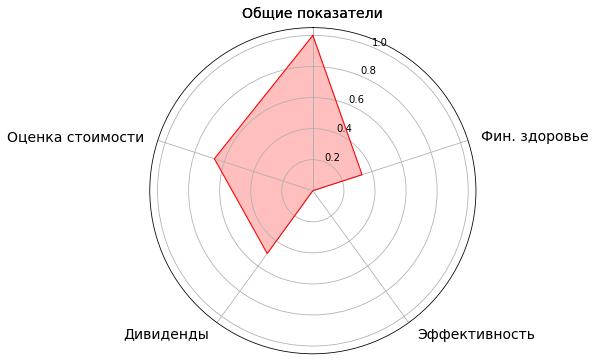

In [29]:
# Each attribute we'll plot in the radar chart.
labels = ['Общие показатели', 'Фин. здоровье', 'Эффективность', 'Дивиденды', 'Оценка стоимости']

# Let's look at the 1970 Chevy Impala and plot it.
values = [2/2, 1/3, 0/4, 1/2, 2/3]


num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

values += values[:1]
angles += angles[:1]
labels += labels[:1]


# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data.
ax.plot(angles, values, color='red', linewidth=1)
# Fill it in.
ax.fill(angles, values, color='red', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels);
ax.tick_params(axis='x', which='major', labelsize=14)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')
# plt.savefig('../images/11_solve.png', dpi=200)

## Вывод

Интересная компания с приличными показателями, может выиграть от коронавируса, есть над чем подумать